# Linear Regression Assignment 


A bike-sharing system is a service in which bikes are made available for shared use to individuals on a short term basis for a price or free. Many bike share systems allow people to borrow a bike from a "dock" which is usually computer-controlled wherein the user enters the payment information, and the system unlocks it. This bike can then be returned to another dock belonging to the same system.


A US bike-sharing provider BoomBikes has recently suffered considerable dips in their revenues due to the ongoing Corona pandemic. The company is finding it very difficult to sustain in the current market scenario. So, it has decided to come up with a mindful business plan to be able to accelerate its revenue as soon as the ongoing lockdown comes to an end, and the economy restores to a healthy state. 


In such an attempt, BoomBikes aspires to understand the demand for shared bikes among the people after this ongoing quarantine situation ends across the nation due to Covid-19. They have planned this to prepare themselves to cater to the people's needs once the situation gets better all around and stand out from other service providers and make huge profits.


They have contracted a consulting company to understand the factors on which the demand for these shared bikes depends. Specifically, they want to understand the factors affecting the demand for these shared bikes in the American market. The company wants to know:

Which variables are significant in predicting the demand for shared bikes.
How well those variables describe the bike demands
Based on various meteorological surveys and people's styles, the service provider firm has gathered a large dataset on daily bike demands across the American market based on some factors. 


Business Goal:
You are required to model the demand for shared bikes with the available independent variables. It will be used by the management to understand how exactly the demands vary with different features. They can accordingly manipulate the business strategy to meet the demand levels and meet the customer's expectations. Further, the model will be a good way for management to understand the demand dynamics of a new market. 

### Importing Important Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [2]:
from sklearn import linear_model
from sklearn.linear_model import LinearRegression

### Step 1: Reading and Understanding Data

In [3]:
#Reading the data set
day=pd.read_csv('day.csv')
day.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,1,1,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,2,1,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,3,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,4,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,5,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [4]:
#checking dimentions of dataset
columns,rows=day.shape
print("Columns=",columns)
print("Rows=",rows)

Columns= 730
Rows= 16


In [5]:
#checking attributes 
day.columns

Index(['instant', 'dteday', 'season', 'yr', 'mnth', 'holiday', 'weekday',
       'workingday', 'weathersit', 'temp', 'atemp', 'hum', 'windspeed',
       'casual', 'registered', 'cnt'],
      dtype='object')

In [6]:
#checking attributes information 
day.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


In [7]:
# Summary of all numeric columns
day.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,365.500000,2.498630,0.500000,6.526027,0.028767,2.995890,0.690411,1.394521,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,210.877136,1.110184,0.500343,3.450215,0.167266,2.000339,0.462641,0.544807,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,183.250000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,365.500000,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,547.750000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,730.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


In [8]:
day.isnull().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

#### Mapping Variables

In [9]:
def season_map(x):
    return x.map({1:'spring', 2:'summer', 3:'rainfall', 4:'winter'})
day[['season']] = day[['season']].apply(season_map)

In [10]:
def mnth_map(x):
    return x.map({
        1:'Jan',
        2:'Feb',
        3:'Mar',
        4:'Apr',
        5:'May',
        6:'Jun',
        7:'Jul',
        8:'Aug',
        9:'Sep',
        10:'Oct',
        11:'Nov',
        12:'Dec'
    })

day[['mnth']] = day[['mnth']].apply(mnth_map)

In [11]:
def weekday_map(x):
    return x.map({
        0:'Sun',
        1:'Mon',
        2:'Tue',
        3:'Wed',
        4:'Thr',
        5:'Fri',
        6:'Sat'
    })
day[['weekday']] = day[['weekday']].apply(weekday_map)

In [12]:
def weathersit_map(x):
    return x.map({
        1:'Clear',
        2:'Mist + Cloudy',
        3:'Light Snow + Rain',
        4:'Heavy Rain'
    })

day[['weathersit']] = day[['weathersit']].apply(weathersit_map)

In [13]:
day['dteday'] =  pd.to_datetime(day['dteday'])

In [14]:
day.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2018-01-01,spring,0,Jan,0,Mon,1,Mist + Cloudy,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,2018-02-01,spring,0,Jan,0,Tue,1,Mist + Cloudy,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,2018-03-01,spring,0,Jan,0,Wed,1,Clear,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,2018-04-01,spring,0,Jan,0,Thr,1,Clear,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,2018-05-01,spring,0,Jan,0,Fri,1,Clear,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [15]:
day.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   instant     730 non-null    int64         
 1   dteday      730 non-null    datetime64[ns]
 2   season      730 non-null    object        
 3   yr          730 non-null    int64         
 4   mnth        730 non-null    object        
 5   holiday     730 non-null    int64         
 6   weekday     730 non-null    object        
 7   workingday  730 non-null    int64         
 8   weathersit  730 non-null    object        
 9   temp        730 non-null    float64       
 10  atemp       730 non-null    float64       
 11  hum         730 non-null    float64       
 12  windspeed   730 non-null    float64       
 13  casual      730 non-null    int64         
 14  registered  730 non-null    int64         
 15  cnt         730 non-null    int64         
dtypes: datetime64[ns](1), floa

### Step 2: Data Visualization 


#### Visualizing Numerical Variables

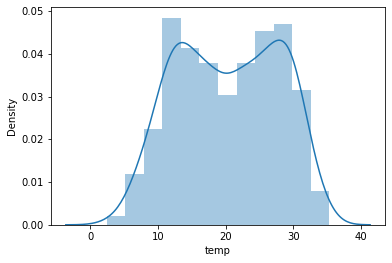

In [16]:
sns.distplot(day['temp'])
plt.show()

***Inference:-*** temperature curve is distorted normal distribution curve and mean is around 20.

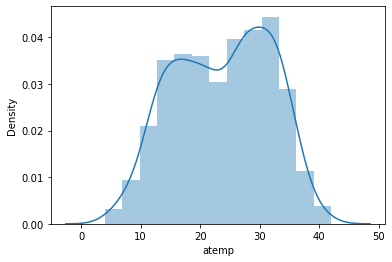

In [17]:
sns.distplot(day['atemp'])
plt.show()

***Inference:-*** Adjusted temprature curve is distorted normal distribution curve with mean around 23.

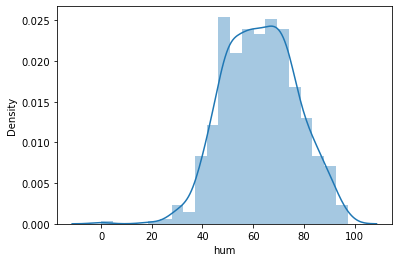

In [18]:
sns.distplot(day['hum'])
plt.show()

***Inference:-*** Humidity is normally distributed with mean around 62.76.
    

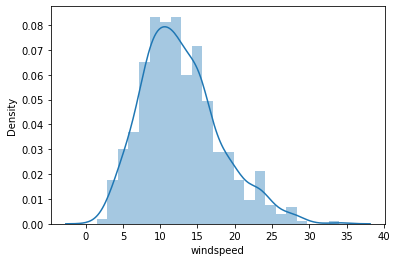

In [19]:
sns.distplot(day['windspeed'])
plt.show()

***Inference:-*** windspeed is right skewed distribution with mean of around 12.76.

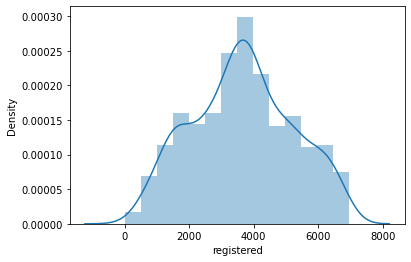

In [20]:
sns.distplot(day['registered'])
plt.show()

***Inference:-*** registered bikes data show distorted distribution curve with mean of aroung 3658.

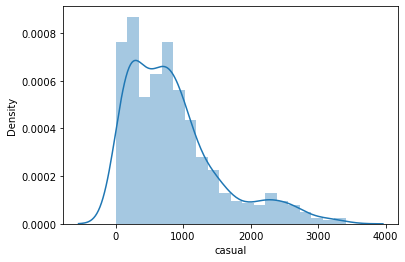

In [21]:
sns.distplot(day['casual'])
plt.show()

***Inference:-*** casual data of bikes show right skewed distribution with mean of around 849.

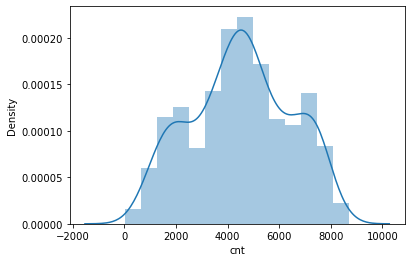

In [22]:
sns.distplot(day['cnt'])
plt.show()

***Inference:-*** count data of bikes also show distorted distribution with mean of around 4508.

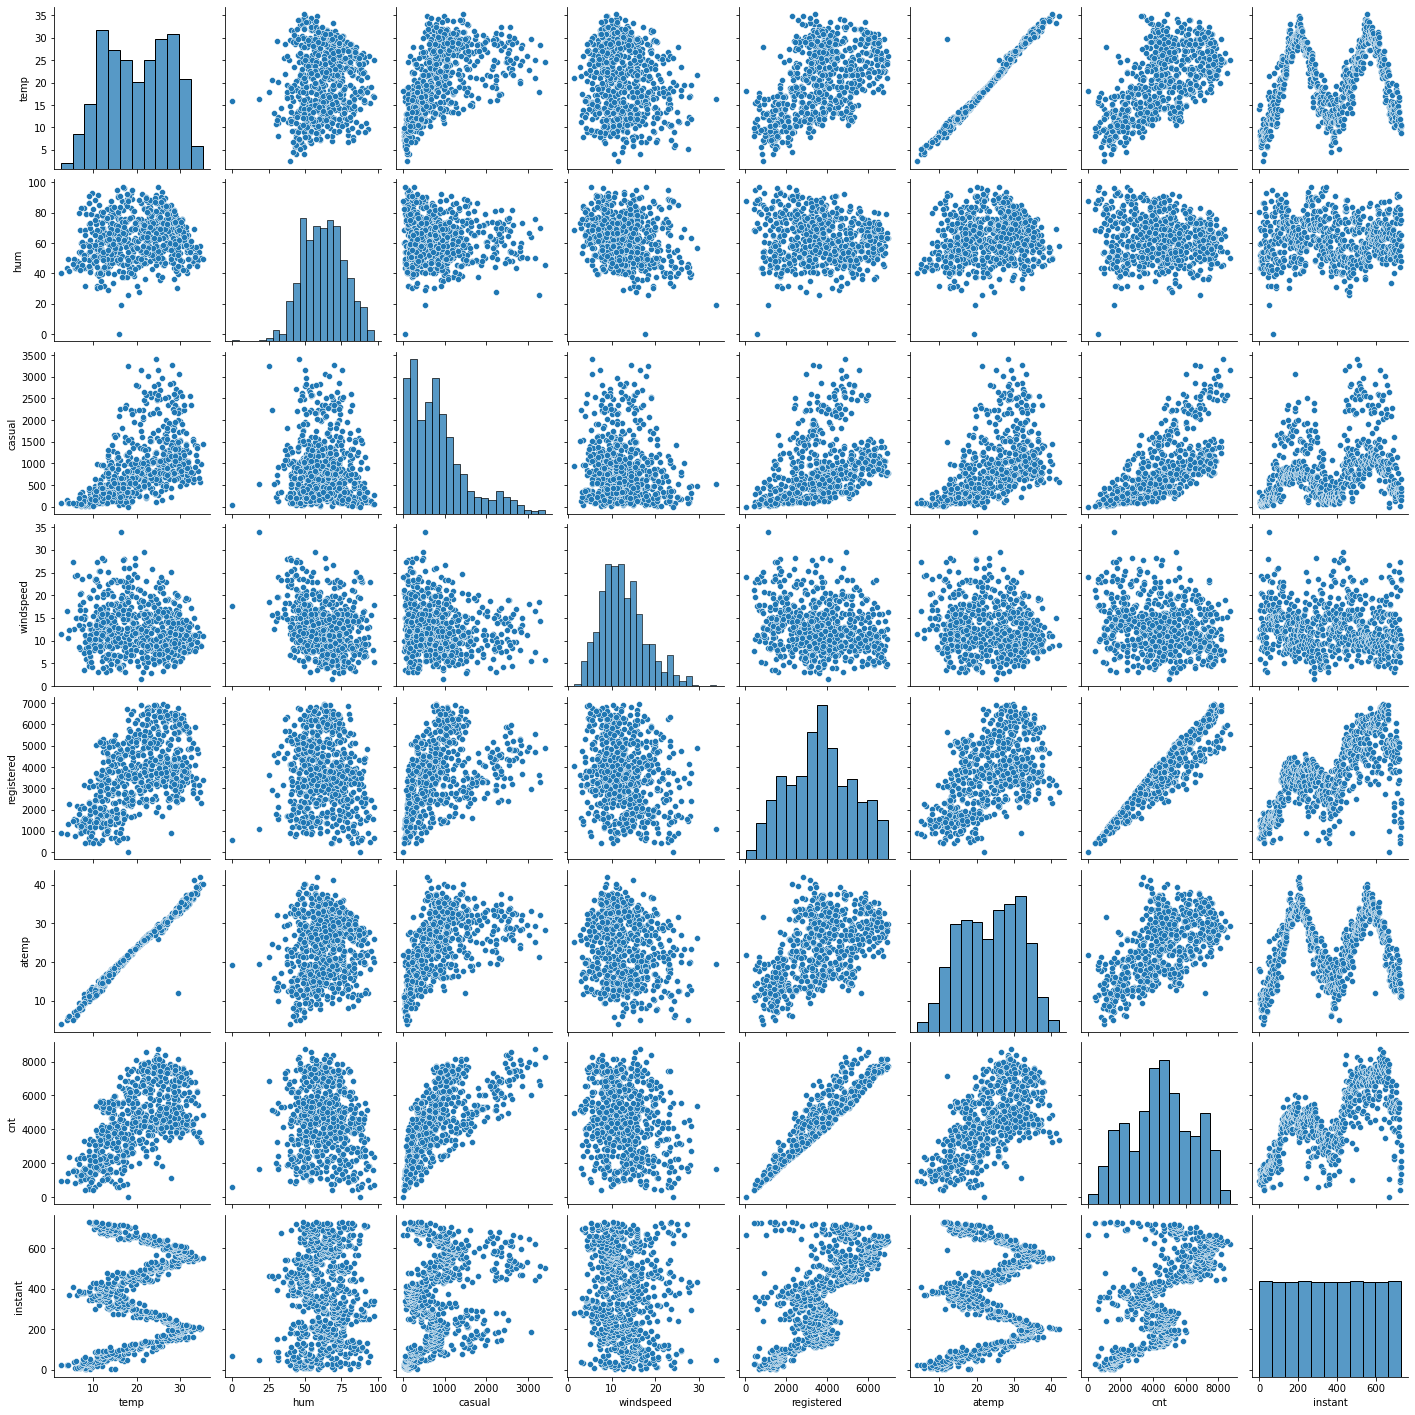

In [23]:
sns.pairplot(day, vars=["temp", "hum",'casual','windspeed','registered','atemp','cnt','instant'])
plt.show()

***Inference:-*** 
1. Casual, Registered, cnt are showing linear correlation.
2. Temperature, adjusted temperature, cnt are showing good correlation.
3. Humidity,windspeed, cnt are not showing so clear and good correlation.
4. correlation between instant and cnt is not good.

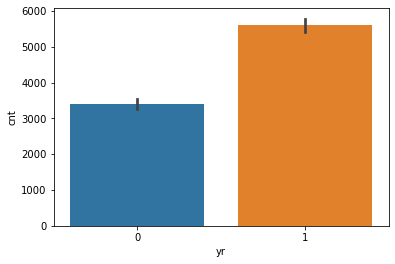

In [24]:
#Relation between Year and count of bike rentals
sns.barplot('yr','cnt',data=day)
plt.show()

***Inference:-*** 2019 which is denoted by 1 has more number of bikes in use than 2018 which is denoted by 0.

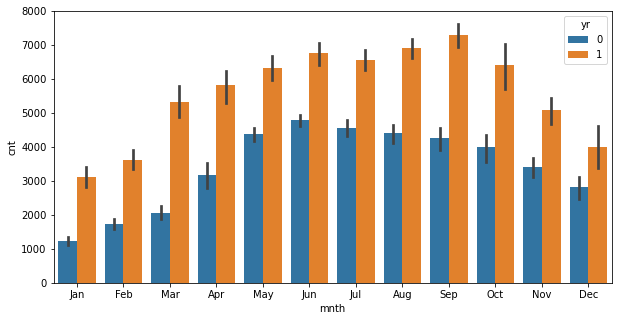

In [25]:
# Relation between month & year and count
plt.figure(figsize=(10,5))
sns.barplot('mnth','cnt',hue='yr',data=day)
plt.show()

***Inference:-*** September month shows highest use of bikes in 2019 while in 2018 maximum use of bikes is in june month.

#### Visualzing Categorical Variables

In [26]:
# extracting all the categorical variables in the dataset
day_categorical = day.select_dtypes(exclude=['float64','datetime64','int64'])
day_categorical.columns


Index(['season', 'mnth', 'weekday', 'weathersit'], dtype='object')

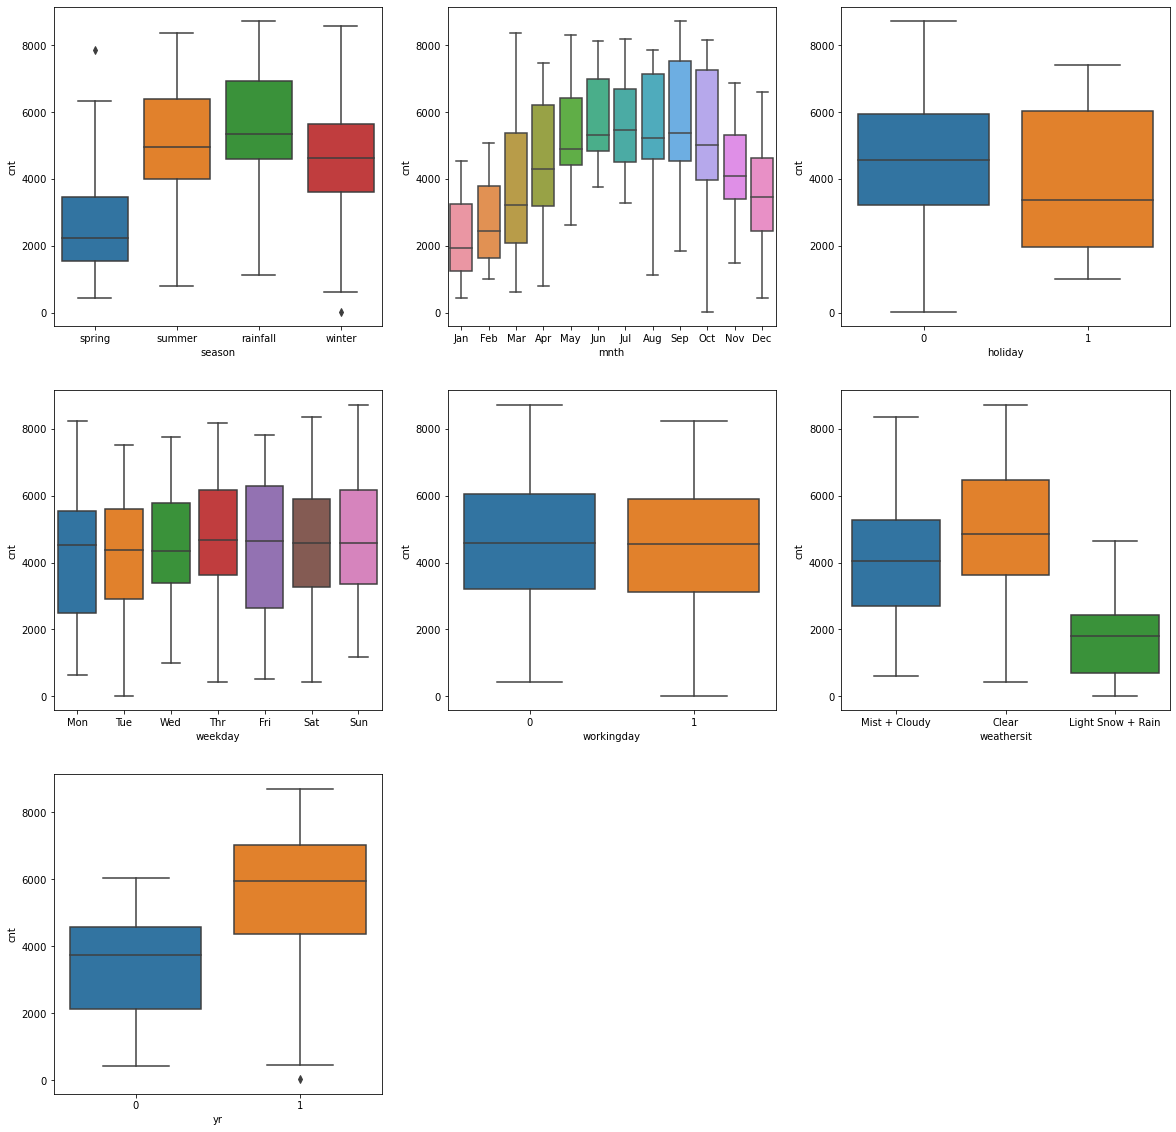

In [27]:
# Visualizing Categorical Variables
plt.figure(figsize=(20,20))

plt.subplot(3,3,1)
sns.boxplot(x='season', y='cnt', data=day)

plt.subplot(3,3,2)
sns.boxplot(x='mnth', y='cnt', data=day)

plt.subplot(3,3,3)
sns.boxplot(x='holiday', y='cnt', data=day)

plt.subplot(3,3,4)
sns.boxplot(x='weekday', y='cnt', data=day)

plt.subplot(3,3,5)
sns.boxplot(x='workingday', y='cnt', data=day)

plt.subplot(3,3,6)
sns.boxplot(x='weathersit', y='cnt', data=day)

plt.subplot(3,3,7)
sns.boxplot(x='yr', y='cnt', data=day)

plt.show();

***Inference:-*** 
1. Count of the bikes hired is higher in rainfall season.
2. The maximum count and 75th quartile is highest in the month of september but the range is higher in october month.
3. Median value count for holidays is lesser than the no holiday days.
4. Inter Quartile Range is highest for friday but median is almost for all weekdays.
5. Bikes counts are leat in lighe snow and light rain weather settings.
6. Whether it is working day or not median and Inter Quartile Range for Bike count is almost same.
7. Use of bikes is much higher in 2019 than in 2018.

#### Correlation Matrix and Heatmap

In [28]:
# Correlation matrix 
cor = day.corr()
cor

,instant,yr,holiday,workingday,temp,atemp,hum,windspeed,casual,registered,cnt
instant,1.000000,0.866026,0.016275,-0.015171,0.150738,0.152773,0.016080,-0.112667,0.275604,0.660544,0.629896
yr,0.866026,1.000000,0.008195,-0.011852,0.048789,0.047215,-0.112547,-0.011624,0.250502,0.596911,0.569728
holiday,0.016275,0.008195,1.000000,-0.257009,-0.028764,-0.032703,-0.015662,0.006257,0.054055,-0.109142,-0.068764
workingday,-0.015171,-0.011852,-0.257009,1.000000,0.002044,0.010657,0.053770,-0.002453,-0.090369,0.005466,-0.027640
temp,0.150738,0.048789,-0.028764,0.002044,1.000000,0.991696,0.128565,-0.158186,0.542731,0.539436,0.627044
atemp,0.152773,0.047215,-0.032703,0.010657,0.991696,1.000000,0.141512,-0.183876,0.543362,0.543678,0.630685
hum,0.016080,-0.112547,-0.015662,0.053770,0.128565,0.141512,1.000000,-0.248506,-0.075211,-0.089212,-0.098543
windspeed,-0.112667,-0.011624,0.006257,-0.002453,-0.158186,-0.183876,-0.248506,1.000000,-0.167995,-0.217914,-0.235132
casual,0.275604,0.250502,0.054055,-0.090369,0.542731,0.543362,-0.075211,-0.167995,1.000000,0.394137,0.672123
registered,0.660544,0.596911,-0.109142,0.005466,0.539436,0.543678,-0.089212,-0.217914,0.394137,1.000000,0.945411


In [29]:
mask = np.array(cor)
mask

array([[ 1.        ,  0.86602622,  0.01627537, -0.01517121,  0.1507385 ,
         0.15277255,  0.01607974, -0.11266745,  0.27560376,  0.66054384,
         0.62989572],
       [ 0.86602622,  1.        ,  0.00819534, -0.01185197,  0.04878919,
         0.04721519, -0.11254712, -0.01162435,  0.25050173,  0.59691062,
         0.56972847],
       [ 0.01627537,  0.00819534,  1.        , -0.25700855, -0.02876407,
        -0.03270285, -0.01566158,  0.00625714,  0.05405465, -0.10914179,
        -0.06876375],
       [-0.01517121, -0.01185197, -0.25700855,  1.        ,  0.0020436 ,
         0.0106574 ,  0.05377041, -0.00245345, -0.09036852,  0.00546562,
        -0.02763988],
       [ 0.1507385 ,  0.04878919, -0.02876407,  0.0020436 ,  1.        ,
         0.99169618,  0.12856468, -0.15818638,  0.54273144,  0.53943622,
         0.62704403],
       [ 0.15277255,  0.04721519, -0.03270285,  0.0106574 ,  0.99169618,
         1.        ,  0.14151172, -0.1838764 ,  0.54336235,  0.54367823,
         0.630

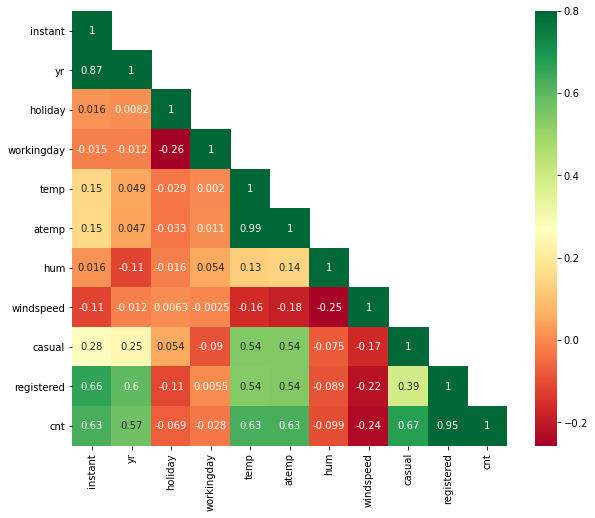

In [30]:
# Plotting heatmap
mask = np.array(cor)
mask[np.tril_indices_from(mask)] = False
plt.figure(figsize=(10,8))
sns.heatmap(cor, mask=mask, vmax=.8, square=True, annot=True,cmap='RdYlGn');

***Inference:-***
1. Highly correlated variables are registered-cnt, temp-atemp, yr-instant.
2. Least Correlated variables are windspeed-cnt, workingday-holiday.

### Step 3: Data Preparation

In [31]:
day.columns

Index(['instant', 'dteday', 'season', 'yr', 'mnth', 'holiday', 'weekday',
       'workingday', 'weathersit', 'temp', 'atemp', 'hum', 'windspeed',
       'casual', 'registered', 'cnt'],
      dtype='object')

In [32]:
day = pd.get_dummies(day, columns=['season', 'mnth', 'weekday','weathersit'], drop_first=True)
day.head()

,instant,dteday,yr,holiday,workingday,temp,atemp,hum,windspeed,casual,...,mnth_Oct,mnth_Sep,weekday_Mon,weekday_Sat,weekday_Sun,weekday_Thr,weekday_Tue,weekday_Wed,weathersit_Light Snow + Rain,weathersit_Mist + Cloudy
0,1,2018-01-01,0,0,1,14.110847,18.18125,80.5833,10.749882,331,...,0,0,1,0,0,0,0,0,0,1
1,2,2018-02-01,0,0,1,14.902598,17.68695,69.6087,16.652113,131,...,0,0,0,0,0,0,1,0,0,1
2,3,2018-03-01,0,0,1,8.050924,9.47025,43.7273,16.636703,120,...,0,0,0,0,0,0,0,1,0,0
3,4,2018-04-01,0,0,1,8.200000,10.60610,59.0435,10.739832,108,...,0,0,0,0,0,1,0,0,0,0
4,5,2018-05-01,0,0,1,9.305237,11.46350,43.6957,12.522300,82,...,0,0,0,0,0,0,0,0,0,0


#### Dropping all unnecessary variables

In [33]:
day.drop(['instant','dteday','casual','registered','atemp'], axis=1, inplace=True)

#### Separating independent and dependent variables

In [34]:
# Assigning values to X and y
y=day.pop('cnt')
X=day

In [35]:
X.head()

,yr,holiday,workingday,temp,hum,windspeed,season_spring,season_summer,season_winter,mnth_Aug,...,mnth_Oct,mnth_Sep,weekday_Mon,weekday_Sat,weekday_Sun,weekday_Thr,weekday_Tue,weekday_Wed,weathersit_Light Snow + Rain,weathersit_Mist + Cloudy
0,0,0,1,14.110847,80.5833,10.749882,1,0,0,0,...,0,0,1,0,0,0,0,0,0,1
1,0,0,1,14.902598,69.6087,16.652113,1,0,0,0,...,0,0,0,0,0,0,1,0,0,1
2,0,0,1,8.050924,43.7273,16.636703,1,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,0,0,1,8.200000,59.0435,10.739832,1,0,0,0,...,0,0,0,0,0,1,0,0,0,0
4,0,0,1,9.305237,43.6957,12.522300,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [36]:
y.head()

0     985
1     801
2    1349
3    1562
4    1600
Name: cnt, dtype: int64

### Step 4: Splitting the data into training and testing sets

In [37]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=10)

In [38]:
X_train.shape

(584, 28)

In [39]:
num_feature = list(X_train.describe().columns)
num_feature

['yr',
 'holiday',
 'workingday',
 'temp',
 'hum',
 'windspeed',
 'season_spring',
 'season_summer',
 'season_winter',
 'mnth_Aug',
 'mnth_Dec',
 'mnth_Feb',
 'mnth_Jan',
 'mnth_Jul',
 'mnth_Jun',
 'mnth_Mar',
 'mnth_May',
 'mnth_Nov',
 'mnth_Oct',
 'mnth_Sep',
 'weekday_Mon',
 'weekday_Sat',
 'weekday_Sun',
 'weekday_Thr',
 'weekday_Tue',
 'weekday_Wed',
 'weathersit_Light Snow + Rain',
 'weathersit_Mist + Cloudy']

In [40]:
# Scaling

from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train[num_feature] = sc.fit_transform(X_train[num_feature])
X_test[num_feature] = sc.transform(X_test[num_feature])

In [41]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 584 entries, 176 to 265
Data columns (total 28 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   yr                            584 non-null    float64
 1   holiday                       584 non-null    float64
 2   workingday                    584 non-null    float64
 3   temp                          584 non-null    float64
 4   hum                           584 non-null    float64
 5   windspeed                     584 non-null    float64
 6   season_spring                 584 non-null    float64
 7   season_summer                 584 non-null    float64
 8   season_winter                 584 non-null    float64
 9   mnth_Aug                      584 non-null    float64
 10  mnth_Dec                      584 non-null    float64
 11  mnth_Feb                      584 non-null    float64
 12  mnth_Jan                      584 non-null    float64
 13  mnt

In [42]:
X_train.head()

,yr,holiday,workingday,temp,hum,windspeed,season_spring,season_summer,season_winter,mnth_Aug,...,mnth_Oct,mnth_Sep,weekday_Mon,weekday_Sat,weekday_Sun,weekday_Thr,weekday_Tue,weekday_Wed,weathersit_Light Snow + Rain,weathersit_Mist + Cloudy
176,-0.986394,-0.18338,0.667491,1.029631,-0.795446,-1.218661,-0.574714,-0.595809,-0.572078,-0.288943,...,-0.295843,-0.305995,-0.412723,-0.40129,-0.407024,-0.424026,2.605123,-0.426833,-0.188311,-0.721688
172,-0.986394,-0.18338,0.667491,1.325474,0.537639,-0.213881,-0.574714,-0.595809,-0.572078,-0.288943,...,-0.295843,-0.305995,-0.412723,-0.40129,-0.407024,-0.424026,-0.383859,-0.426833,-0.188311,-0.721688
142,-0.986394,-0.18338,0.667491,0.761523,1.241370,0.582149,-0.574714,1.678390,-0.572078,-0.288943,...,-0.295843,-0.305995,-0.412723,-0.40129,-0.407024,-0.424026,-0.383859,2.342838,-0.188311,1.385641
237,-0.986394,-0.18338,-1.498147,1.140573,0.906669,-1.355307,-0.574714,-0.595809,-0.572078,3.460893,...,-0.295843,-0.305995,-0.412723,-0.40129,2.456857,-0.424026,-0.383859,-0.426833,-0.188311,-0.721688
531,1.013794,-0.18338,-1.498147,0.761523,-0.858377,-0.286206,-0.574714,1.678390,-0.572078,-0.288943,...,-0.295843,-0.305995,-0.412723,-0.40129,2.456857,-0.424026,-0.383859,-0.426833,-0.188311,-0.721688


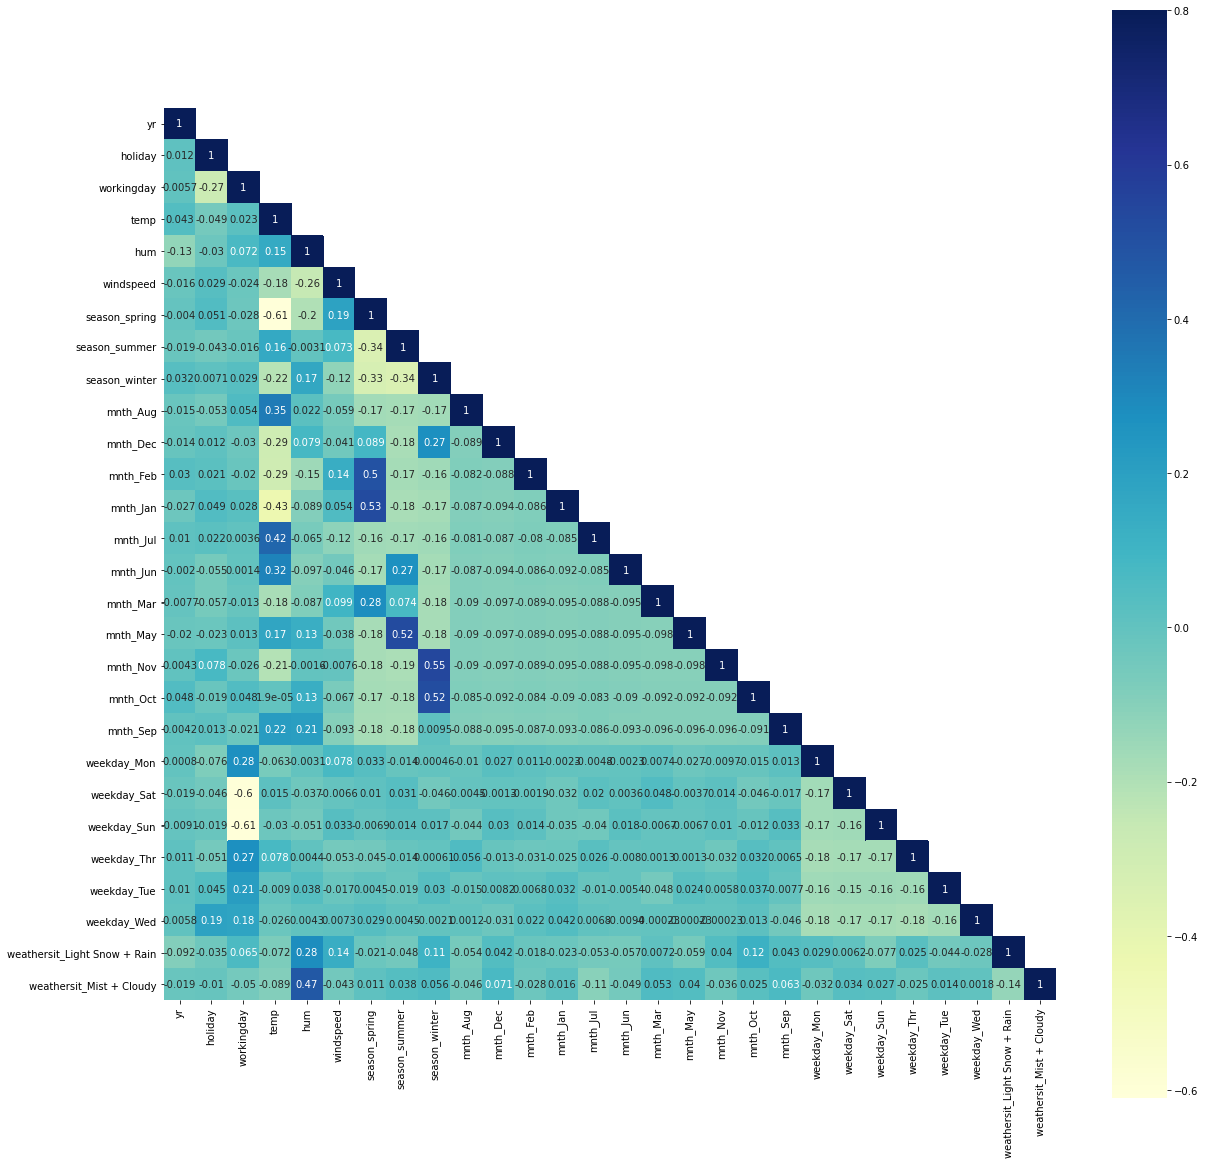

In [43]:
# Let's check the correlation coefficients to see which variables are highly correlated
plt.figure(figsize = (20, 20))
corr_X = X_train.corr()
mask = np.array(corr_X)
mask[np.tril_indices_from(mask)] = False
sns.heatmap(corr_X, mask=mask, vmax=.8, square=True, annot=True,cmap="YlGnBu");

### Step 5: Building a Linear Model 

In [44]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression()

In [45]:
coeff = pd.DataFrame(regressor.coef_, X.columns, columns=['Coefficients'])
coeff

,Coefficients
yr,1010.964826
holiday,-158.065070
workingday,-167.612867
temp,849.581377
hum,-227.447973
windspeed,-244.256728
season_spring,-397.809330
season_summer,-28.835967
season_winter,287.395783
mnth_Aug,-71.488879


In [46]:
regressor.intercept_

4481.450342465753

In [47]:
y_pred = regressor.predict(X_test)

In [48]:
day = pd.DataFrame({
    'Actual':y_test,
    'Predicted': y_pred
})
day

,Actual,Predicted
566,4459,3448.360231
374,3598,3865.631918
181,5362,5076.832467
529,7363,6521.232621
233,4758,4542.263895
...,...,...
6,1510,1178.831351
705,5008,4976.775861
261,4539,4080.425975
579,7175,6590.972069


#### RFE

In [49]:
# Importing RFE and LinearRegression
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

In [50]:
# Running RFE with the output number of the variable equal to 10
lm = LinearRegression()
lm.fit(X_train, y_train)

rfe = RFE(lm, 25)             # running RFE
rfe = rfe.fit(X_train, y_train)

In [51]:
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('yr', True, 1),
 ('holiday', True, 1),
 ('workingday', True, 1),
 ('temp', True, 1),
 ('hum', True, 1),
 ('windspeed', True, 1),
 ('season_spring', True, 1),
 ('season_summer', False, 2),
 ('season_winter', True, 1),
 ('mnth_Aug', True, 1),
 ('mnth_Dec', True, 1),
 ('mnth_Feb', True, 1),
 ('mnth_Jan', True, 1),
 ('mnth_Jul', True, 1),
 ('mnth_Jun', False, 3),
 ('mnth_Mar', True, 1),
 ('mnth_May', True, 1),
 ('mnth_Nov', True, 1),
 ('mnth_Oct', False, 4),
 ('mnth_Sep', True, 1),
 ('weekday_Mon', True, 1),
 ('weekday_Sat', True, 1),
 ('weekday_Sun', True, 1),
 ('weekday_Thr', True, 1),
 ('weekday_Tue', True, 1),
 ('weekday_Wed', True, 1),
 ('weathersit_Light Snow + Rain', True, 1),
 ('weathersit_Mist + Cloudy', True, 1)]

In [52]:
col = X_train.columns[rfe.support_]
col

Index(['yr', 'holiday', 'workingday', 'temp', 'hum', 'windspeed',
       'season_spring', 'season_winter', 'mnth_Aug', 'mnth_Dec', 'mnth_Feb',
       'mnth_Jan', 'mnth_Jul', 'mnth_Mar', 'mnth_May', 'mnth_Nov', 'mnth_Sep',
       'weekday_Mon', 'weekday_Sat', 'weekday_Sun', 'weekday_Thr',
       'weekday_Tue', 'weekday_Wed', 'weathersit_Light Snow + Rain',
       'weathersit_Mist + Cloudy'],
      dtype='object')

In [53]:
X_train.columns[~rfe.support_]

Index(['season_summer', 'mnth_Jun', 'mnth_Oct'], dtype='object')

In [54]:
# Creating X_test dataframe with RFE selected variables
X_train_rfe = X_train[col]

In [55]:
# Adding a constant variable 
import statsmodels.api as sm  
X_train_rfe = sm.add_constant(X_train_rfe)

In [56]:
lm = sm.OLS(y_train,X_train_rfe).fit()   # Running the linear model

In [57]:
#Let's see the summary of our linear model
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.847
Model:                            OLS   Adj. R-squared:                  0.840
Method:                 Least Squares   F-statistic:                     123.4
Date:                Wed, 04 Aug 2021   Prob (F-statistic):          8.09e-209
Time:                        20:24:42   Log-Likelihood:                -4704.7
No. Observations:                 584   AIC:                             9461.
Df Residuals:                     558   BIC:                             9575.
Df Model:                          25                                         
Covariance Type:            nonrobust                                         
                                   coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------
const           

In [58]:
# Calculate the VIFs for the new model
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
X = X_train
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,workingday,52.82
22,weekday_Sun,30.74
21,weekday_Sat,30.61
6,season_spring,9.98
8,season_winter,8.19
7,season_summer,7.83
3,temp,6.79
17,mnth_Nov,6.56
1,holiday,6.49
18,mnth_Oct,5.80


***Inference:-*** from the model summary observations are:- 
        R squared value = 0.847
        but there are variables with high p-value >0.05 and high VIF >5, therefore dropping variable with highest p-value i.e. mnth_Mar.

In [59]:
X_train_new = X_train_rfe.drop(['mnth_Mar'], axis = 1)

In [60]:
# Adding a constant variable 
import statsmodels.api as sm  
X_train_lm = sm.add_constant(X_train_new)

In [61]:
lm2 = sm.OLS(y_train,X_train_lm).fit()   # Running the linear model

In [62]:
#Let's see the summary of our linear model
print(lm2.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.847
Model:                            OLS   Adj. R-squared:                  0.840
Method:                 Least Squares   F-statistic:                     128.6
Date:                Wed, 04 Aug 2021   Prob (F-statistic):          9.86e-210
Time:                        20:24:42   Log-Likelihood:                -4705.0
No. Observations:                 584   AIC:                             9460.
Df Residuals:                     559   BIC:                             9569.
Df Model:                          24                                         
Covariance Type:            nonrobust                                         
                                   coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------
const           

In [63]:
# Calculate the VIFs for the new model
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
X = X_train_new
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
3,workingday,52.66
19,weekday_Sun,30.63
18,weekday_Sat,30.53
2,holiday,6.47
4,temp,4.17
7,season_spring,3.77
8,season_winter,2.48
12,mnth_Jan,2.27
5,hum,2.09
11,mnth_Feb,1.97


***Inference:-*** from the model summary observations are:- 
        R squared value = 0.847
        but there are variables with high p-value >0.05 and high VIF >5, therefore dropping variable with highest p-value i.e. weekday_Sun.

In [64]:
X_train_new1 = X_train_new.drop(['weekday_Sun'], axis = 1)

In [65]:
# Adding a constant variable 
import statsmodels.api as sm  
X_train_lm2 = sm.add_constant(X_train_new1)

In [66]:
lm3 = sm.OLS(y_train,X_train_lm2).fit()   # Running the linear model

In [67]:
#Let's see the summary of our linear model
print(lm3.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.847
Model:                            OLS   Adj. R-squared:                  0.840
Method:                 Least Squares   F-statistic:                     134.4
Date:                Wed, 04 Aug 2021   Prob (F-statistic):          9.65e-211
Time:                        20:24:42   Log-Likelihood:                -4705.2
No. Observations:                 584   AIC:                             9458.
Df Residuals:                     560   BIC:                             9563.
Df Model:                          23                                         
Covariance Type:            nonrobust                                         
                                   coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------
const           

In [68]:
# Calculate the VIFs for the new model
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
X = X_train_new1
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
4,temp,4.16
7,season_spring,3.76
3,workingday,3.06
8,season_winter,2.48
12,mnth_Jan,2.27
5,hum,2.09
11,mnth_Feb,1.97
15,mnth_Nov,1.82
21,weekday_Wed,1.79
19,weekday_Thr,1.76


***Inference:-*** from the model summary observations are:- 
        R squared value = 0.847 &
        VIF < 5
        but there are variables with high p-value > 0.05, therefore dropping variable with highest p-value i.e. weekday_Sat.

In [69]:
X_train_new2 = X_train_new1.drop(['weekday_Sat'], axis = 1)

In [70]:
# Adding a constant variable 
import statsmodels.api as sm  
X_train_lm3 = sm.add_constant(X_train_new2)
lm4 = sm.OLS(y_train,X_train_lm3).fit()   # Running the linear model
#Let's see the summary of our linear model
print(lm4.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.847
Model:                            OLS   Adj. R-squared:                  0.841
Method:                 Least Squares   F-statistic:                     140.7
Date:                Wed, 04 Aug 2021   Prob (F-statistic):          8.28e-212
Time:                        20:24:42   Log-Likelihood:                -4705.2
No. Observations:                 584   AIC:                             9456.
Df Residuals:                     561   BIC:                             9557.
Df Model:                          22                                         
Covariance Type:            nonrobust                                         
                                   coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------
const           

In [71]:
# Calculate the VIFs for the new model
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
X = X_train_new2
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
4,temp,4.16
7,season_spring,3.76
8,season_winter,2.48
3,workingday,2.32
12,mnth_Jan,2.27
5,hum,2.09
11,mnth_Feb,1.97
15,mnth_Nov,1.82
20,weekday_Wed,1.79
18,weekday_Thr,1.76


***Inference:-*** from the model summary observations are:- 
        R squared value = 0.847 &
        VIF < 5
        but there are variables with high p-value > 0.05, therefore dropping variable with highest p-value i.e. weekday_thr.

In [72]:
X_train_new3 = X_train_new2.drop(['weekday_Thr'], axis = 1)

In [73]:
# Adding a constant variable 
import statsmodels.api as sm  
X_train_lm4 = sm.add_constant(X_train_new3)
lm5 = sm.OLS(y_train,X_train_lm4).fit()   # Running the linear model
#Let's see the summary of our linear model
print(lm5.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.846
Model:                            OLS   Adj. R-squared:                  0.841
Method:                 Least Squares   F-statistic:                     147.5
Date:                Wed, 04 Aug 2021   Prob (F-statistic):          9.23e-213
Time:                        20:24:42   Log-Likelihood:                -4705.5
No. Observations:                 584   AIC:                             9455.
Df Residuals:                     562   BIC:                             9551.
Df Model:                          21                                         
Covariance Type:            nonrobust                                         
                                   coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------
const           

In [74]:
# Calculate the VIFs for the new model
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
X = X_train_new2
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
4,temp,4.16
7,season_spring,3.76
8,season_winter,2.48
3,workingday,2.32
12,mnth_Jan,2.27
5,hum,2.09
11,mnth_Feb,1.97
15,mnth_Nov,1.82
20,weekday_Wed,1.79
18,weekday_Thr,1.76


***Inference:-*** from the model summary observations are:- 
        R squared value = 0.847 &
        VIF < 5
        but there are variables with high p-value > 0.05, therefore dropping variable with highest p-value i.e. mnth_Aug.

In [75]:
X_train_new4 = X_train_new3.drop(['mnth_Aug'], axis = 1)

In [76]:
# Adding a constant variable 
import statsmodels.api as sm  
X_train_lm5 = sm.add_constant(X_train_new4)
lm6 = sm.OLS(y_train,X_train_lm5).fit()   # Running the linear model
#Let's see the summary of our linear model
print(lm6.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.846
Model:                            OLS   Adj. R-squared:                  0.841
Method:                 Least Squares   F-statistic:                     154.7
Date:                Wed, 04 Aug 2021   Prob (F-statistic):          1.42e-213
Time:                        20:24:42   Log-Likelihood:                -4706.2
No. Observations:                 584   AIC:                             9454.
Df Residuals:                     563   BIC:                             9546.
Df Model:                          20                                         
Covariance Type:            nonrobust                                         
                                   coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------
const           

In [77]:
# Calculate the VIFs for the new model
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
X = X_train_new2
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
4,temp,4.16
7,season_spring,3.76
8,season_winter,2.48
3,workingday,2.32
12,mnth_Jan,2.27
5,hum,2.09
11,mnth_Feb,1.97
15,mnth_Nov,1.82
20,weekday_Wed,1.79
18,weekday_Thr,1.76


***Inference:-*** from the model summary observations are:- 
        R squared value = 0.847 &
        VIF < 5
        but there are variables with high p-value > 0.05, therefore dropping variable with highest p-value i.e. workingday.

In [78]:
X_train_new5 = X_train_new4.drop(['workingday'], axis = 1)

In [79]:
# Adding a constant variable 
import statsmodels.api as sm  
X_train_lm6 = sm.add_constant(X_train_new5)
lm7 = sm.OLS(y_train,X_train_lm6).fit()   # Running the linear model
#Let's see the summary of our linear model
print(lm7.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.846
Model:                            OLS   Adj. R-squared:                  0.841
Method:                 Least Squares   F-statistic:                     163.0
Date:                Wed, 04 Aug 2021   Prob (F-statistic):          1.23e-214
Time:                        20:24:43   Log-Likelihood:                -4706.4
No. Observations:                 584   AIC:                             9453.
Df Residuals:                     564   BIC:                             9540.
Df Model:                          19                                         
Covariance Type:            nonrobust                                         
                                   coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------
const           

In [80]:
# Calculate the VIFs for the new model
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
X = X_train_new5
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
6,season_spring,3.73
3,temp,3.55
7,season_winter,2.39
10,mnth_Jan,2.23
4,hum,2.09
9,mnth_Feb,1.96
13,mnth_Nov,1.80
8,mnth_Dec,1.61
19,weathersit_Mist + Cloudy,1.60
11,mnth_Jul,1.39


***Inference:-*** from the model summary observations are:- 
        R squared value = 0.847 &
        VIF < 5
        but there are variables with high p-value > 0.05, therefore dropping variable with highest p-value i.e. weekday_Wed.

In [81]:
X_train_new6 = X_train_new5.drop(['weekday_Wed'], axis = 1)

In [82]:
# Adding a constant variable 
import statsmodels.api as sm  
X_train_lm7 = sm.add_constant(X_train_new6)
lm8 = sm.OLS(y_train,X_train_lm7).fit()   # Running the linear model
#Let's see the summary of our linear model
print(lm8.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.845
Model:                            OLS   Adj. R-squared:                  0.840
Method:                 Least Squares   F-statistic:                     171.1
Date:                Wed, 04 Aug 2021   Prob (F-statistic):          5.35e-215
Time:                        20:24:43   Log-Likelihood:                -4708.2
No. Observations:                 584   AIC:                             9454.
Df Residuals:                     565   BIC:                             9537.
Df Model:                          18                                         
Covariance Type:            nonrobust                                         
                                   coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------
const           

In [83]:
# Calculate the VIFs for the new model
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
X = X_train_new5
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
6,season_spring,3.73
3,temp,3.55
7,season_winter,2.39
10,mnth_Jan,2.23
4,hum,2.09
9,mnth_Feb,1.96
13,mnth_Nov,1.80
8,mnth_Dec,1.61
19,weathersit_Mist + Cloudy,1.60
11,mnth_Jul,1.39


***Inference:-*** from the model summary observations are:- 
        R squared value = 0.847 &
        VIF < 5
        but there are variables with high p-value > 0.05, therefore dropping variable with highest p-value i.e. weekday_Mon.

In [84]:
X_train_new7 = X_train_new6.drop(['weekday_Mon'], axis = 1)

In [85]:
# Adding a constant variable 
import statsmodels.api as sm  
X_train_lm8 = sm.add_constant(X_train_new7)
lm9 = sm.OLS(y_train,X_train_lm8).fit()   # Running the linear model
#Let's see the summary of our linear model
print(lm9.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.844
Model:                            OLS   Adj. R-squared:                  0.840
Method:                 Least Squares   F-statistic:                     180.6
Date:                Wed, 04 Aug 2021   Prob (F-statistic):          1.30e-215
Time:                        20:24:43   Log-Likelihood:                -4709.4
No. Observations:                 584   AIC:                             9455.
Df Residuals:                     566   BIC:                             9533.
Df Model:                          17                                         
Covariance Type:            nonrobust                                         
                                   coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------
const           

In [86]:
# Calculate the VIFs for the new model
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
X = X_train_new7
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
6,season_spring,3.73
3,temp,3.52
7,season_winter,2.39
10,mnth_Jan,2.22
4,hum,2.07
9,mnth_Feb,1.96
13,mnth_Nov,1.80
8,mnth_Dec,1.61
17,weathersit_Mist + Cloudy,1.59
11,mnth_Jul,1.39


***Inference:-*** from the model summary observations are:- 
        R squared value = 0.847 &
        VIF < 5
        but there are variables with high p-value > 0.05, therefore dropping variable with highest p-value i.e. mnth_May.

In [87]:
X_train_new8 = X_train_new7.drop(['mnth_May'], axis = 1)

In [88]:
# Adding a constant variable 
import statsmodels.api as sm  
X_train_lm9 = sm.add_constant(X_train_new8)
lm10 = sm.OLS(y_train,X_train_lm9).fit()   # Running the linear model
#Let's see the summary of our linear model
print(lm10.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.843
Model:                            OLS   Adj. R-squared:                  0.839
Method:                 Least Squares   F-statistic:                     190.7
Date:                Wed, 04 Aug 2021   Prob (F-statistic):          6.07e-216
Time:                        20:24:43   Log-Likelihood:                -4711.4
No. Observations:                 584   AIC:                             9457.
Df Residuals:                     567   BIC:                             9531.
Df Model:                          16                                         
Covariance Type:            nonrobust                                         
                                   coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------
const           

In [89]:
# Calculate the VIFs for the new model
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
X = X_train_new8
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
6,season_spring,3.60
3,temp,3.52
7,season_winter,2.26
10,mnth_Jan,2.22
4,hum,2.01
9,mnth_Feb,1.96
12,mnth_Nov,1.79
8,mnth_Dec,1.61
16,weathersit_Mist + Cloudy,1.58
15,weathersit_Light Snow + Rain,1.37


***Inference:-*** from the model summary observations are:- 
        R squared value = 0.847 &
        VIF < 5 &
        p-value <0.05. Now the model seems to be good.
        
        

### Step 6: Residual Analysis of the train data

In [90]:
y_train_cnt = lm10.predict(X_train_lm9)

Text(0.5, 0, 'Errors')

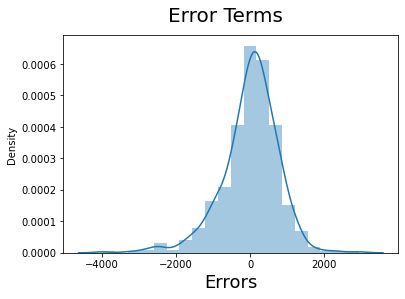

In [91]:
# Plot the histogram of the error terms
fig = plt.figure()
sns.distplot((y_train - y_train_cnt), bins = 20)
fig.suptitle('Error Terms', fontsize = 20)                  # Plot heading 
plt.xlabel('Errors', fontsize = 18)                         # X-label

***Inference:-*** Residuals are normally distributed around zero (mean=0). therefore the assumption is validated and model is good and fit to be implemented on test data.

### Step 7: Making Predictions Using the Final Model

In [92]:
X_test.describe()

,yr,holiday,workingday,temp,hum,windspeed,season_spring,season_summer,season_winter,mnth_Aug,...,mnth_Oct,mnth_Sep,weekday_Mon,weekday_Sat,weekday_Sun,weekday_Thr,weekday_Tue,weekday_Wed,weathersit_Light Snow + Rain,weathersit_Mist + Cloudy
count,146.000000,146.000000,146.000000,146.000000,146.000000,146.000000,146.000000,146.000000,146.000000,146.000000,...,146.000000,146.000000,146.000000,146.000000,146.000000,146.000000,146.000000,146.000000,146.000000,146.000000
mean,0.068500,-0.106168,-0.014833,0.033496,-0.052861,0.109503,-0.019818,-0.112931,-0.031782,0.147682,...,0.081829,-0.061199,-0.024278,0.054496,0.004904,-0.138166,0.230315,-0.161248,-0.150649,-0.057735
std,1.002029,0.657427,1.009496,1.075836,0.879832,1.007566,0.991589,0.933250,0.983996,1.206899,...,1.119947,0.905871,0.978347,1.057651,1.008461,0.847688,1.211860,0.818312,0.455074,0.982315
min,-0.986394,-0.183380,-1.498147,-1.994743,-2.426042,-1.893813,-0.574714,-0.595809,-0.572078,-0.288943,...,-0.295843,-0.305995,-0.412723,-0.401290,-0.407024,-0.424026,-0.383859,-0.426833,-0.188311,-0.721688
25%,-0.986394,-0.183380,-1.498147,-0.897987,-0.718208,-0.515200,-0.574714,-0.595809,-0.572078,-0.288943,...,-0.295843,-0.305995,-0.412723,-0.401290,-0.407024,-0.424026,-0.383859,-0.426833,-0.188311,-0.721688
50%,1.013794,-0.183380,0.667491,0.125916,-0.073120,-0.006258,-0.574714,-0.595809,-0.572078,-0.288943,...,-0.295843,-0.305995,-0.412723,-0.401290,-0.407024,-0.424026,-0.383859,-0.426833,-0.188311,-0.721688
75%,1.013794,-0.183380,0.667491,1.048120,0.621314,0.614233,-0.574714,-0.595809,-0.572078,-0.288943,...,-0.295843,-0.305995,-0.412723,-0.401290,-0.407024,-0.424026,-0.383859,-0.426833,-0.188311,1.385641
max,1.013794,5.453150,0.667491,1.968017,2.190624,3.267307,1.739996,1.678390,1.748015,3.460893,...,3.380167,3.268027,2.422930,2.491962,2.456857,2.358346,2.605123,2.342838,5.310367,1.385641


In [93]:
# Adding constant variable to test dataframe
import statsmodels.api as sm  
X_test_lm10 = sm.add_constant(X_test)

In [94]:
X_train_new8.columns

Index(['const', 'yr', 'holiday', 'temp', 'hum', 'windspeed', 'season_spring',
       'season_winter', 'mnth_Dec', 'mnth_Feb', 'mnth_Jan', 'mnth_Jul',
       'mnth_Nov', 'mnth_Sep', 'weekday_Tue', 'weathersit_Light Snow + Rain',
       'weathersit_Mist + Cloudy'],
      dtype='object')

In [95]:
X_test_lm10 = X_test_lm10[X_train_new8.columns]

In [96]:
y_pred = lm10.predict(X_test_lm10)

#### R squared value for test data

In [97]:
from sklearn.metrics import r2_score
r2_score(y_test,y_pred)

0.8376466384315794

#### adjusted R squared value for test data

In [98]:
#Adjusted R^2
#adj r2=1-(1-R2)*(n-1)/(n-p-1)

#n =sample size , p = number of independent variables
r2=0.8376466384315794
n=X_test_lm10.shape[0]
p=X_test_lm10.shape[1]

Adj_r2=1-(1-r2)*(n-1)/(n-p-1)
print(Adj_r2)


0.8160840825982736


### Step 8: Model Evaluation

Text(0, 0.5, 'y_pred')

<Figure size 432x288 with 0 Axes>

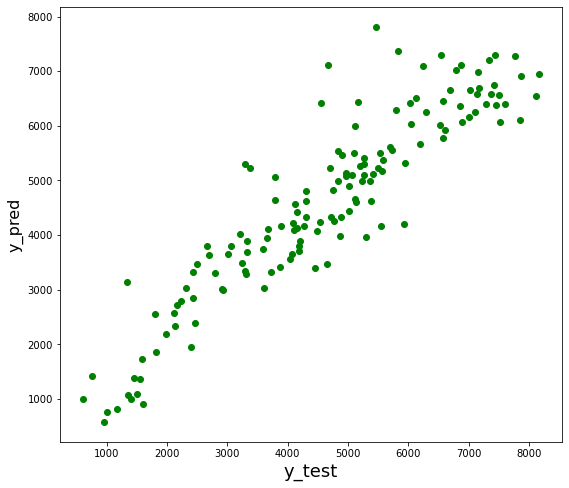

In [99]:
# Plotting y_test and y_pred to understand the spread.
fig = plt.figure()
plt.figure(figsize=(9,8))
plt.scatter(y_test,y_pred,color='green')
fig.suptitle('y_test vs y_pred', fontsize=20)              # Plot heading 
plt.xlabel('y_test', fontsize=18)                          # X-label
plt.ylabel('y_pred', fontsize=16)                          # Y-label

#### Visualising the fit on the test set

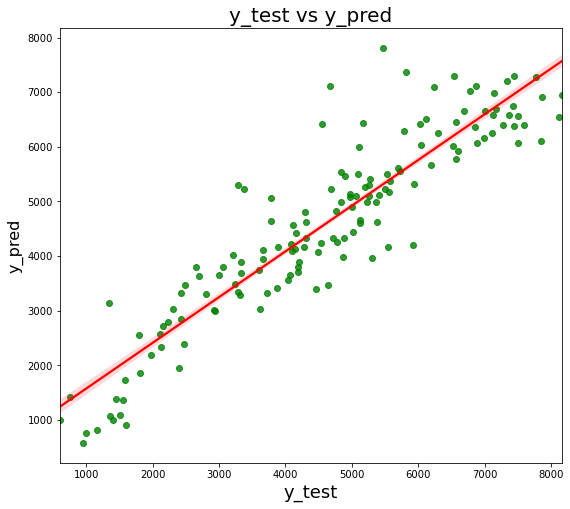

In [100]:
#Regression plot
plt.figure(figsize=(9,8))
sns.regplot(x=y_test, y=y_pred, ci=68, fit_reg=True,scatter_kws={"color": "green"}, line_kws={"color": "red"})

plt.title('y_test vs y_pred', fontsize=20)              # Plot heading 
plt.xlabel('y_test', fontsize=18)                          # X-label
plt.ylabel('y_pred', fontsize=16)                          # Y-label
plt.show()

#### The equation of our best fitted line is:

count=1014.01×yr+(-111.94)×holiday+800.67×temp+(-222.32)×hum+(-247.33)×windspeed+(-360.49)×season_spring+280.99×season_winter+(-157.58)×mnth_Dec+(-114.31)×mnth_Feb+(-160.93)×mnth_Jan+(-168.68)xmnth_Jul+(-175.06)xmnth_Nov+114.08xmnth_Sep+(-76.13)xweekday_Tue+(-361.43)x(weathersit_Light Snow+Rain)+(-201.78)xweathersit_Mist+Cloudy

### Final Result Comparison between Train model and Test

- Train R^2 : 0.843
- Train Adjusted R^2 : 0.839
- Test R^2: 0.837
- Test Adjusted R^2: 0.816
- Difference in R^2 between train and test: 0.006%
- Difference in adjusted R^2 between Train and test: 0.023% which is less than 5%


### Interpretation

- We arrived at a very decent model for the the demand for shared bikes with the significant variables.

- We can see that year variable is having the highest coefficient 1014.01, which means with the every coming new year the bike rentals increases by 1014.01 units but it might be facing dips in their revenues due to the ongoing Corona pandemic and by the time it reduces the things will be better.

- Similary we can see coefficients of other variables in the equation for best fitted line.

- We also see there are some variables with negative coefficients, A negative coefficient suggests that as the independent variable increases, the dependent variable tends to decrease. We have spring, mist cloudy , light snow variables with negative coefficient. The coefficient value signifies how much the mean of the dependent variable changes given a one-unit shift in the independent variable while holding other variables in the model constant.

### Business Goals

- We can see demand for bikes was more in 2019 than 2018, so just focus as there is increase in 2019 and might be facing dips in their revenues due to the ongoing Corona pandemic and by the time it reduces the things will be better.

- Can focus more on Summer & Winter season, August, September month, Weekends, Working days as they have good influence on bike rentals.

- We can see spring season has negative coefficients and negatively correlated to bike rentals. So we can give some offers there to increase the demand

- Now seeing to weathersit variable, we have got negative coefficients for Mist +cloudy and Lightsnow weather... And yes we can give offers